In [63]:
import pandas as pd
import csv
import sqlalchemy as sqAl
from sqlalchemy import create_engine




psql_username = 'postgres'
from config import psql_password 
database_name = 'postgres'
host = 'illinoiseducation.cseojgcrzzgi.us-east-1.rds.amazonaws.com'

connection_string = f'postgresql://{psql_username}:{psql_password}@{host}:5432/{database_name}'

engine = create_engine(connection_string)

In [64]:
fin_df = pd.read_sql("select * from financials", engine)
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,Total School Tax Rate per $100 2016-17,Total Expenditures 2016-17,Education Fund 2016-17 - Dollars,General Admin 2016-17 - Dollars,Local Property Taxes 2016-17 - Dollars,General State Aid 2016-17 - Dollars,Federal Funding 2016-17 - Dollars
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [65]:
fin_df.rename(columns = {'Total School Tax Rate per $100 2016-17':'TaxRate'}, inplace = True)
fin_df.rename(columns = {'Total Expenditures 2016-17':'Expenditures'}, inplace = True)
fin_df.rename(columns = {'Education Fund 2016-17 - Dollars':'EdFund'}, inplace = True)
fin_df.rename(columns = {'General Admin 2016-17 - Dollars':'GenAdmin'}, inplace = True)
fin_df.rename(columns = {'Local Property Taxes 2016-17 - Dollars':'PTax'}, inplace = True)
fin_df.rename(columns = {'General State Aid 2016-17 - Dollars':'StateAid'}, inplace = True)
fin_df.rename(columns = {'Federal Funding 2016-17 - Dollars':'FedFund'}, inplace = True)
fin_df = fin_df[fin_df["District"].str.contains("City of Chicago SD 299") == False]
fin_df

,RCDTS,Type,District,City,County,District Type,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,5.19,5143696.0,3225555.0,564111.0,2531179.0,1775730.0,389805.0
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,3.85,5443479.0,3907503.0,622126.0,2253278.0,1905501.0,362160.0
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,3.64,7564187.0,5960372.0,770369.0,3128518.0,2892183.0,620882.0
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,5.59,6350671.0,4584398.0,671307.0,3634218.0,2318723.0,383059.0
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,4.04,92289055.0,48343392.0,2423593.0,39430662.0,12774845.0,8539441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,8.63,81581856.0,51129825.0,1762740.0,48132481.0,12961928.0,4672336.0
845,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,4.63,21225430.0,12507512.0,641779.0,16114818.0,876450.0,644859.0
846,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,4.68,18288571.0,12289373.0,459145.0,10113226.0,2092655.0,2594452.0
847,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,3.89,41320015.0,17942896.0,829057.0,23739445.0,772564.0,1080635.0


In [66]:
fin_scores_df = pd.read_sql("select * from district_test_scores", engine)
fin_scores_df['ELA'] = pd.to_numeric(fin_scores_df['ELA'])
fin_scores_df['Math'] = pd.to_numeric(fin_scores_df['Math'])
fin_scores_df = fin_scores_df.astype({'ELA': int, 'Math': int})
fin_scores_df.dtypes

RCDTS                         object
County                        object
Dist #                        object
District Name/ School Name    object
City                          object
ELA                            int32
Math                           int32
dtype: object

In [67]:
school_size = pd.read_sql("select * from district", engine)
school_size = school_size.astype({'Student Enrollment - Total': float,
                                'Student Enrollment - Low Income %': float,
                                'Avg Class Size – All Grades': float,
                                'Avg Teaching Exp': float,
                                'Bachelor Degree': float,
                                'Masters Degree ': float,
                                'Teacher Retention Rate': float,
                                'Teacher Avg Salary': float,
                                'Admin Avg Salary': float})
school_size = school_size.filter(['RCDTS', 'Student Enrollment - Total'], axis = 1)
school_size.rename(columns = {'Student Enrollment - Total':'Enrollment'}, inplace = True)

In [68]:
fin_merge_df = pd.merge(fin_df, fin_scores_df, on = "RCDTS", how = "inner")

fin_merge_df = fin_merge_df.astype({"TaxRate": float, 'Expenditures': float, 'EdFund': float, 'GenAdmin': float,
'PTax': float, 'StateAid': float, 'FedFund': float})

fin_merge_df = pd.merge(fin_merge_df, school_size, how = 'inner')
fin_merge_df = fin_merge_df.dropna()
fin_merge_df = fin_merge_df.drop(columns = ['RCDTS', 'Type', "District", "City_x", 'District Type',
                                            'Dist # ', 'District Name/ School Name',
                                           'City_y', 'County_x', 'County_y'])

fin_merge_df['TaxRate'] = fin_merge_df['TaxRate']/fin_merge_df['Enrollment']
fin_merge_df['Expenditures'] = fin_merge_df['Expenditures']/fin_merge_df['Enrollment'] 
fin_merge_df['EdFund'] = fin_merge_df['EdFund']/fin_merge_df['Enrollment'] 
fin_merge_df['GenAdmin'] = fin_merge_df['GenAdmin']/fin_merge_df['Enrollment']
fin_merge_df['PTax'] = fin_merge_df['PTax']/fin_merge_df['Enrollment']
fin_merge_df['StateAid'] = fin_merge_df['StateAid']/fin_merge_df['Enrollment']
fin_merge_df['FedFund'] = fin_merge_df['FedFund']/fin_merge_df['Enrollment']
fin_merge_df

,District Size,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund,ELA,Math,Enrollment
0,MEDIUM,0.009284,9201.602862,5770.223614,1009.143113,4528.048301,3176.618962,697.325581,524,489,559.0
1,MEDIUM,0.006395,9042.323920,6490.868771,1033.431894,3742.986711,3165.284053,601.594684,500,485,602.0
2,MEDIUM,0.004165,8654.676201,6819.647597,881.429062,3579.540046,3309.133867,710.391304,490,488,874.0
3,MEDIUM,0.008294,9422.360534,6801.777448,996.004451,5392.014837,3440.241840,568.336795,505,485,674.0
4,LARGE,0.000625,14266.355696,7473.085794,374.647241,6095.325707,1974.778946,1320.055805,489,473,6469.0
...,...,...,...,...,...,...,...,...,...,...,...
466,LARGE,0.001764,16673.177192,10449.586143,360.257511,9837.008175,2649.075823,954.902105,479,444,4893.0
467,MEDIUM,0.003133,14360.913396,8462.457375,434.221245,10903.124493,592.997294,436.305142,513,492,1478.0
468,MEDIUM,0.003454,13497.100369,9069.647970,338.852399,7463.635424,1544.394834,1914.724723,480,458,1355.0
469,MEDIUM,0.002593,27546.676667,11961.930667,552.704667,15826.296667,515.042667,720.423333,479,483,1500.0


In [69]:
fin_merge_df = fin_merge_df.astype({"TaxRate": float, 'Expenditures': float, 'EdFund': float, 'GenAdmin': float,
'PTax': float, 'StateAid': float, 'FedFund': float})
fin_merge_df.dtypes

District Size     object
TaxRate          float64
Expenditures     float64
EdFund           float64
GenAdmin         float64
PTax             float64
StateAid         float64
FedFund          float64
ELA                int32
Math               int32
Enrollment       float64
dtype: object

In [70]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [71]:
X = fin_merge_df.drop(columns = ['ELA', 'Math', 'Enrollment'], axis = 1)
X = pd.get_dummies(X)
X.head(2)


,TaxRate,Expenditures,EdFund,GenAdmin,PTax,StateAid,FedFund,District Size_LARGE,District Size_MEDIUM,District Size_SMALL
0,0.009284,9201.602862,5770.223614,1009.143113,4528.048301,3176.618962,697.325581,0,1,0
1,0.006395,9042.323920,6490.868771,1033.431894,3742.986711,3165.284053,601.594684,0,1,0


In [72]:
y = fin_merge_df['Math']

In [73]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [74]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)

511.33150780525585


In [75]:
y_prediction =  LR.predict(x_test)
y_prediction


array([530.94762459, 557.79695124, 481.37925381, 503.28989089,
       508.82851837, 484.6159854 , 532.72552294, 502.76356272,
       416.16591256, 496.51738131, 481.96788118, 495.90225591,
       511.67341445, 493.03360082, 487.97333679, 503.51737212,
       529.54967615, 472.42990031, 445.71017349, 377.6333585 ,
       450.56234458, 460.22897934, 456.07952619, 490.249273  ,
       469.32035556, 500.24573017, 446.53752483, 482.04838327,
       445.60447609, 528.18309818, 476.84719128, 489.00324845,
       468.78455201, 499.51304307, 437.90027281, 509.45774187,
       486.56799278, 481.87117552, 469.47716206, 471.80790827,
       487.27554099, 520.31564701, 459.779106  , 495.28263794,
       468.46879035, 540.23393584, 454.06694096, 473.38030028,
       474.65554588, 480.94782474, 483.32719425, 288.8219821 ,
       501.05591365, 495.53423256, 535.46775689, 487.43468783,
       498.21685766, 527.34678351, 449.80034613, 473.71829917,
       485.73073978, 508.7441952 , 481.82392309, 488.20

In [76]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5068975871813912
mean_sqrd_error is== 940.7801767309808
root_mean_squared error of is== 30.672140074194054


In [77]:
my_length = []
i = 1

while i <= len(y_test):
    my_length.append(i)
    i += 1


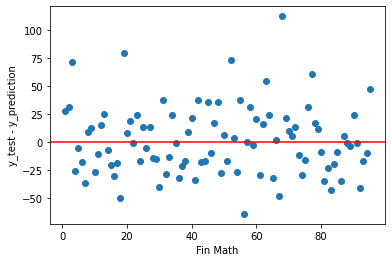

In [78]:
plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Fin Math')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/Fin_Math.png', dpi = 100, bbox_inches = 'tight')
plt.show()

522.9875052850244
r2 score is  0.4715449937848466
mean_sqrd_error is== 687.0034532122498
root_mean_squared error of is== 26.21075071821198


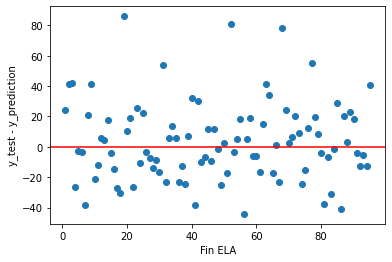

In [79]:
y = fin_merge_df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))


my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Fin ELA')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/Fin_ELA.png', dpi = 100, bbox_inches = 'tight')
plt.show()

1034.3190130902804
r2 score is  0.5084601965409814
mean_sqrd_error is== 3044.4595302304842
root_mean_squared error of is== 55.17662122883644


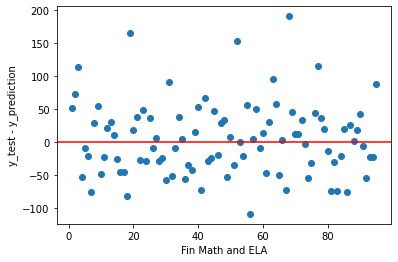

In [80]:
fin_merge_df['ELA/Math Sum'] = fin_merge_df['ELA'] +  fin_merge_df['Math']
y = fin_merge_df['ELA/Math Sum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
print(LR.intercept_)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

my_length = []
i = 1
while i <= len(y_test):
    my_length.append(i)
    i += 1

plt.scatter(my_length, (y_test - y_prediction))
plt.ylabel('y_test - y_prediction')
plt.xlabel('Fin Math and ELA')
plt.axhline(y = 0, c = "red")
plt.savefig('R2_Graphs/Fin_Both.png', dpi = 100, bbox_inches = 'tight')
plt.show()